In [ ]:
SERVICE_KEY = "AA8951AA-39F8-4E1D-A62E-3C82CDFC48D4"

import pandas as pd
import numpy as np
import requests
import calendar
import time
import os

os.makedirs("jamsu", exist_ok=True)

url = f'http://api.hrfco.go.kr/{SERVICE_KEY}/waterlevel/info.json'
response = requests.get(url)

data = response.json()
for con in data['content']:
    if '서울' in con['obsnm']:
        print(con['obsnm'], con['wlobscd'])
    if '팔당'  in con['obsnm']:
        print(con['obsnm'], con['wlobscd'])

bridge = {
    "서울시(잠수교)": 1018680,
}

for name, code in bridge.items():
    for year in range(2013, 2023):
        ms, me = (1, 13)
        for month in range(ms, me):
            weekday, end = calendar.monthrange(year, month)
            sdate = f"{year}{month:02}010000"
            edate = f"{year}{month:02}{end:02}2350"
            url = f"http://api.hrfco.go.kr/{SERVICE_KEY}/waterlevel/list/10M/{code}/{sdate}/{edate}.json"
            response = requests.get(url)
            df = pd.DataFrame(response.json()['content'])
            df.to_csv(f"jamsu/{year}{month:02}_{name}.csv") ## CHANGE HERE
            time.sleep(3)


팔당댐 1017678
남양주시(팔당댐) 1017690
남양주시(팔당대교) 1018610
팔당대교 1018611
서울시(광진교) 1018640
서울시(대곡교) 1018655
서울시(대치교) 1018658
서울시(청담대교) 1018662
서울시(창동교) 1018669
서울시(월계2교) 1018670
서울시(중랑교) 1018675
서울시(잠수교) 1018680
서울시(한강대교) 1018683
서울시(너부대교) 1018695
서울시(오금교) 1018697
서울시(신대방1교) 1018698
서울시(행주대교) 1019630


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd ./content

/content


In [ ]:
## using %cd and !ls !pwd go to the file directory
!tar -xvf datahj.tar
!clear

tar: datahj.tar: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [ ]:
import pandas as pd
import os
from datetime import datetime, timedelta

files_in_directory = os.listdir('jamsu') ### CHANGE HERE

csv_files = [file for file in files_in_directory if '잠수교' in file] ### CHANGE HERE
csv_files.sort()
print(csv_files)


actual_files = [file[:6] for file in csv_files]

# Generate a list of all year-month from 2012-01 to 2022-12
start_date = datetime(2013, 1, 1)
end_date = datetime(2022, 12, 31)
delta = timedelta(days=1)

expected_files = []
while start_date <= end_date:
    year_month_str = start_date.strftime('%Y%m')
    if year_month_str not in expected_files:
        expected_files.append(year_month_str)
    start_date += delta

# Check for missing files
missing_files = [ym for ym in expected_files if ym not in actual_files]

print('Missing Files:', missing_files)

['201301_서울시(잠수교).csv', '201302_서울시(잠수교).csv', '201303_서울시(잠수교).csv', '201304_서울시(잠수교).csv', '201305_서울시(잠수교).csv', '201306_서울시(잠수교).csv', '201307_서울시(잠수교).csv', '201308_서울시(잠수교).csv', '201309_서울시(잠수교).csv', '201310_서울시(잠수교).csv', '201311_서울시(잠수교).csv', '201312_서울시(잠수교).csv', '201401_서울시(잠수교).csv', '201402_서울시(잠수교).csv', '201403_서울시(잠수교).csv', '201404_서울시(잠수교).csv', '201405_서울시(잠수교).csv', '201406_서울시(잠수교).csv', '201407_서울시(잠수교).csv', '201408_서울시(잠수교).csv', '201409_서울시(잠수교).csv', '201410_서울시(잠수교).csv', '201411_서울시(잠수교).csv', '201412_서울시(잠수교).csv', '201501_서울시(잠수교).csv', '201502_서울시(잠수교).csv', '201503_서울시(잠수교).csv', '201504_서울시(잠수교).csv', '201505_서울시(잠수교).csv', '201506_서울시(잠수교).csv', '201507_서울시(잠수교).csv', '201508_서울시(잠수교).csv', '201509_서울시(잠수교).csv', '201510_서울시(잠수교).csv', '201511_서울시(잠수교).csv', '201512_서울시(잠수교).csv', '201601_서울시(잠수교).csv', '201602_서울시(잠수교).csv', '201603_서울시(잠수교).csv', '201604_서울시(잠수교).csv', '201605_서울시(잠수교).csv', '201606_서울시(잠수교).csv', '201607_서울시(잠수교).csv', '201608_서울

In [ ]:
import pandas as pd
for filename in csv_files:
    df = pd.read_csv('jamsu/' + filename)
    df = df.sort_values("ymdhm", axis=0, ascending=True)
    df.to_csv('jamsu/' + filename)

In [ ]:
list_of_dataframes = []

for filename in csv_files:
    df = pd.read_csv('jamsu/' + filename)
    df = df.drop(columns=['fw', 'links'])  # dropping unnecessary columns
    list_of_dataframes.append(df)

final_df = pd.concat(list_of_dataframes, ignore_index=True)
final_df = final_df[['ymdhm', 'wl']]
final_df['ymdhm'] = pd.to_datetime(final_df['ymdhm'], format='%Y%m%d%H%M')

final_df['wl'] = pd.to_numeric(final_df['wl'], errors='coerce')
final_df['wl'] = final_df['wl'].fillna(final_df['wl'].mean())

final_df.head()

,ymdhm,wl
0,2013-01-01 00:00:00,3.77
1,2013-01-01 00:10:00,3.74
2,2013-01-01 00:20:00,3.72
3,2013-01-01 00:30:00,3.69
4,2013-01-01 00:40:00,3.68


In [ ]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader

train_df = final_df[final_df['ymdhm'] < '2021-01-01']
valid_df = final_df[(final_df['ymdhm'] >= '2021-01-01') & (final_df['ymdhm'] < '2022-01-01')]
test_df = final_df[final_df['ymdhm'] >= '2022-01-01']

def create_sequences(data, labels, seq_length):
    xs = []
    ys = []
    ls = []
    for i in range(len(data) - seq_length):
        x = data.iloc[i:(i+seq_length)]
        y = data.iloc[i+seq_length]
        l = labels.iloc[i:(i+seq_length)]
        xs.append(x)
        ys.append(y)
        ls.append(l)

    return np.array(xs), np.array(ys), np.array(ls)

seq_length = 100  # for example, use the past 10 observations to predict the next one

X_train, y_train, ls = create_sequences(train_df['wl'], train_df['wl'], seq_length)
X_valid, y_valid, ls  = create_sequences(valid_df['wl'], train_df['wl'], seq_length)
X_test, y_test, ls  = create_sequences(test_df['wl'], train_df['wl'], seq_length)

class WaterLevelDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data

    def __len__(self):
        return len(self.X_data)

    def __getitem__(self, i):
        return self.X_data[i], self.y_data[i]


train_dataset = WaterLevelDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float())
valid_dataset = WaterLevelDataset(torch.from_numpy(X_valid).float(), torch.from_numpy(y_valid).float())
test_dataset = WaterLevelDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).float())

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)  # batch size of 1 for testing


In [ ]:
def create_sequences(data, labels, seq_length):
    xs = []
    ys = []
    ls = []
    for i in range(len(data) - seq_length):
        x = data.iloc[i:(i+seq_length)]
        y = data.iloc[i+seq_length]
        l = labels.iloc[i+seq_length]
        xs.append(x)
        ys.append(y)
        ls.append(l)

    return np.array(xs), np.array(ys), np.array(ls)


In [ ]:
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTMModel, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # LSTM layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().to(device)

        # Initializing cell state for first input with zeros
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().to(device)

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Indexing hidden state of last time step
        # out.size() --> (batch_size, seq_length, hidden_size)
        # out[:, -1, :] --> (batch_size, hidden_size) --> just want last time step hidden states!
        out = self.fc(out[:, -1, :])

        return out


In [ ]:
class GRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(GRUModel, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # GRU layers
        self.gru = nn.GRU(input_dim, hidden_dim, layer_dim, batch_first=True)

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().to(device)

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        out, hn = self.gru(x, h0.detach())

        # Indexing hidden state of last time step
        # out.size() --> 100, 10, 32 --> 100 is batch size, 10 is sequence length, 32 is hidden layer dimension
        # out[:, -1, :] --> 100, 32 --> Just want last time step hidden states!
        out = self.fc(out[:, -1, :])

        return out


In [ ]:
class NLinear(nn.Module):
    """
    Normalization-Linear model for time series forecasting
    """
    def __init__(self, seq_len, pred_len, channels, individual):
        super(NLinear, self).__init__()
        self.seq_len = seq_len
        self.pred_len = pred_len
        self.channels = channels
        self.individual = individual

        if self.individual:
            self.Linear = nn.ModuleList()
            for i in range(self.channels):
                self.Linear.append(nn.Linear(self.seq_len, self.pred_len))
        else:
            self.Linear = nn.Linear(self.seq_len, self.pred_len)

    def forward(self, x):
        # x: [Batch, Input length, Channel]
        seq_last = x[:,-1:,:].detach()
        x = x - seq_last
        if self.individual:
            output = torch.zeros([x.size(0),self.pred_len,x.size(2)],dtype=x.dtype).to(x.device)
            for i in range(self.channels):
                output[:,:,i] = self.Linear[i](x[:,:,i])
            x = output
        else:
            x = self.Linear(x.permute(0,2,1)).permute(0,2,1)
        x = x + seq_last
        return x # [Batch, Output length, Channel]


In [ ]:
## Experiment 1
device = torch.device("cuda:0") #"cuda:0" if torch.cuda.is_available() else

input_dim = 1  # since we have univariate series
hidden_dim = 32  # can be any number
layer_dim = 1  # only one layer
output_dim = 1  # we want to predict water level, so it's 1

model_1 = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim)
model_1 = model_1.to(device)

criterion = nn.MSELoss()  # mean squared error loss
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.01)  # Adam optimizer


In [ ]:
num_epochs = 5  # number of epochs

losses = []
for epoch in range(num_epochs):
    model_1.train()
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.view([X_batch.size(0), -1, 1]).to(device)
        y_batch = y_batch.to(device)
        # Forward pass
        outputs = model_1(X_batch)
        loss = criterion(outputs, y_batch)
        losses.append(loss.item())
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


    model_1.eval()
    with torch.no_grad():
        valid_loss = sum(criterion(model_1(X_valid.view([X_valid.size(0), -1, 1]).to(device)), y_valid.to(device)) for X_valid, y_valid in valid_loader)

    print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {loss.item()}, Validation Loss: {valid_loss/len(valid_loader)}')

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([28])) that is different to the input size (torch.Size([28, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input,

Epoch 1/5, Training Loss: 0.20997393131256104, Validation Loss: 0.09016866981983185
Epoch 2/5, Training Loss: 0.21008920669555664, Validation Loss: 0.09027224034070969
Epoch 3/5, Training Loss: 0.20997953414916992, Validation Loss: 0.09018078446388245
Epoch 4/5, Training Loss: 0.1967460811138153, Validation Loss: 0.07761824876070023
Epoch 5/5, Training Loss: 0.17360332608222961, Validation Loss: 0.06331438571214676


In [ ]:
## Experiment 2
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model_2 = NLinear(seq_len=100, pred_len=10, channels=1, individual=False)

model_2 = model_2.to(device)

criterion = nn.MSELoss()  # mean squared error loss
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)  # Adam optimizer


In [ ]:
num_epochs = 5  # number of epochs

losses = []
for epoch in range(num_epochs):
    model_2.train()
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.view([X_batch.size(0), -1, 1]).to(device)
        y_batch = y_batch.to(device)
        # Forward pass
        outputs = model_2(X_batch)
        loss = criterion(outputs, y_batch)
        losses.append(loss.item())
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    model_2.eval()
    with torch.no_grad():
        valid_loss = sum(criterion(model_2(X_valid.view([X_valid.size(0), -1, 1]).to(device)), y_valid.to(device)) for X_valid, y_valid in valid_loader)

    print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {loss.item()}, Validation Loss: {valid_loss/len(valid_loader)}')


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([28])) that is different to the input size (torch.Size([28, 10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse

Epoch 1/5, Training Loss: 0.16962440311908722, Validation Loss: 0.027046289294958115
Epoch 2/5, Training Loss: 0.1687426120042801, Validation Loss: 0.0268877986818552
Epoch 3/5, Training Loss: 0.16793771088123322, Validation Loss: 0.026819752529263496
Epoch 4/5, Training Loss: 0.16726842522621155, Validation Loss: 0.026779014617204666
Epoch 5/5, Training Loss: 0.16671787202358246, Validation Loss: 0.02675093710422516


In [ ]:
## Experiment 3
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

input_dim = 1  # since we have univariate series
hidden_dim = 32  # can be any number
layer_dim = 1  # only one layer
output_dim = 1  # we want to predict water level, so it's 1

model_3 = GRUModel(input_dim, hidden_dim, layer_dim, output_dim)
model_3 = model_3.to(device)

criterion = nn.MSELoss()  # mean squared error loss
optimizer = torch.optim.Adamax(model_3.parameters(), lr=0.01)  # Adam optimizer


In [ ]:
num_epochs = 5  # number of epochs

losses = []
for epoch in range(num_epochs):
    model_3.train()
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.view([X_batch.size(0), -1, 1]).to(device)
        y_batch = y_batch.to(device)
        # Forward pass
        outputs = model_3(X_batch)
        loss = criterion(outputs, y_batch)
        losses.append(loss.item())
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    model_3.eval()
    with torch.no_grad():
        valid_loss = sum(criterion(model_3(X_valid.view([X_valid.size(0), -1, 1]).to(device)), y_valid.to(device)) for X_valid, y_valid in valid_loader)

    print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {loss.item()}, Validation Loss: {valid_loss/len(valid_loader)}')


Epoch 1/5, Training Loss: 0.1588643342256546, Validation Loss: 0.048119932413101196
Epoch 2/5, Training Loss: 0.15440334379673004, Validation Loss: 0.04797876253724098
Epoch 3/5, Training Loss: 0.1704423427581787, Validation Loss: 0.04686766862869263
Epoch 4/5, Training Loss: 0.16383598744869232, Validation Loss: 0.038538359105587006
Epoch 5/5, Training Loss: 0.160818949341774, Validation Loss: 0.04448702186346054


## Test with Data for 2023 prediction

In [ ]:
#### DATA FOR 2023 5 months

SERVICE_KEY = "AA8951AA-39F8-4E1D-A62E-3C82CDFC48D4"

import pandas as pd
import numpy as np
import requests
import calendar
import time

url = f'http://api.hrfco.go.kr/{SERVICE_KEY}/waterlevel/info.json'
response = requests.get(url)

data = response.json()
for con in data['content']:
    if '서울' in con['obsnm']:
        print(con['obsnm'], con['wlobscd'])
    if '팔당'  in con['obsnm']:
        print(con['obsnm'], con['wlobscd'])

bridge = {
    "서울시(잠수교)": 1018680,
}

os.makedirs('2023jamsu', exist_ok=True)

for name, code in bridge.items():
    for year in range(2023, 2024):
        ms, me = (1, 6)
        for month in range(ms, me):
            weekday, end = calendar.monthrange(year, month)
            sdate = f"{year}{month:02}010000"
            edate = f"{year}{month:02}{end:02}2350"
            url = f"http://api.hrfco.go.kr/{SERVICE_KEY}/waterlevel/list/10M/{code}/{sdate}/{edate}.json"
            response = requests.get(url)
            df = pd.DataFrame(response.json()['content'])
            df.to_csv(f"2023jamsu/{year}{month:02}_{name}.csv") ## CHANGE HERE
            time.sleep(3)

팔당댐 1017678
남양주시(팔당댐) 1017690
남양주시(팔당대교) 1018610
팔당대교 1018611
서울시(광진교) 1018640
서울시(대곡교) 1018655
서울시(대치교) 1018658
서울시(청담대교) 1018662
서울시(창동교) 1018669
서울시(월계2교) 1018670
서울시(중랑교) 1018675
서울시(잠수교) 1018680
서울시(한강대교) 1018683
서울시(너부대교) 1018695
서울시(오금교) 1018697
서울시(신대방1교) 1018698
서울시(행주대교) 1019630


In [ ]:
files_in_dir2 = os.listdir('2023jamsu') ### CHANGE HERE

csv_files = [file for file in files_in_dir2 if '잠수교' in file] ### CHANGE HERE
csv_files.sort()
print(csv_files)

['202301_서울시(잠수교).csv', '202302_서울시(잠수교).csv', '202303_서울시(잠수교).csv', '202304_서울시(잠수교).csv', '202305_서울시(잠수교).csv']


In [ ]:
import pandas as pd
for filename in csv_files:
    df = pd.read_csv('2023jamsu/' + filename)
    df = df.sort_values("ymdhm", axis=0, ascending=True)
    df.to_csv('2023jamsu/' + filename)

In [ ]:
test_2023_df = []


files_in_dir2 = os.listdir('2023jamsu') ### CHANGE HERE

csv_files = [file for file in files_in_dir2 if '잠수교' in file] ### CHANGE HERE
csv_files.sort()
print(csv_files)

for df_path in csv_files:
    print('Reading', df_path)
    df = pd.read_csv(os.path.join('2023jamsu', df_path))
    df = df.drop(columns=['fw', 'links'])  # dropping unnecessary columns
    test_2023_df.append(df)

final_df = pd.concat(test_2023_df, ignore_index=True)
final_df = final_df[['ymdhm', 'wl']]
final_df['ymdhm'] = pd.to_datetime(final_df['ymdhm'], format='%Y%m%d%H%M')

final_df['wl'] = pd.to_numeric(final_df['wl'], errors='coerce')
final_df['wl'] = final_df['wl'].fillna(final_df['wl'].mean())

final_df.head()
print(final_df)

['202301_서울시(잠수교).csv', '202302_서울시(잠수교).csv', '202303_서울시(잠수교).csv', '202304_서울시(잠수교).csv', '202305_서울시(잠수교).csv']
Reading 202301_서울시(잠수교).csv
Reading 202302_서울시(잠수교).csv
Reading 202303_서울시(잠수교).csv
Reading 202304_서울시(잠수교).csv
Reading 202305_서울시(잠수교).csv
                    ymdhm    wl
0     2023-01-01 00:00:00  2.64
1     2023-01-01 00:10:00  2.64
2     2023-01-01 00:20:00  2.64
3     2023-01-01 00:30:00  2.64
4     2023-01-01 00:40:00  2.64
...                   ...   ...
21739 2023-05-31 23:10:00  2.94
21740 2023-05-31 23:20:00  2.94
21741 2023-05-31 23:30:00  2.94
21742 2023-05-31 23:40:00  2.94
21743 2023-05-31 23:50:00  2.93

[21744 rows x 2 columns]


In [ ]:
# print(X_test)
print(y_test)
arr = final_df['wl']
n = len(arr)
# print(arr)
print(arr[n-100: n])

[2.68 2.68 2.67 ... 2.65 2.65 2.65]
21644    2.84
21645    2.83
21646    2.83
21647    2.82
21648    2.83
         ... 
21739    2.94
21740    2.94
21741    2.94
21742    2.94
21743    2.93
Name: wl, Length: 100, dtype: float64




---



In [ ]:
X_test, y_test, ls = create_sequences(final_df['wl'], final_df['ymdhm'], seq_length)

In [ ]:
print(ls)
print(len(y_test))

[Timestamp('2023-01-01 16:40:00') Timestamp('2023-01-01 16:50:00')
 Timestamp('2023-01-01 17:00:00') ... Timestamp('2023-05-31 23:30:00')
 Timestamp('2023-05-31 23:40:00') Timestamp('2023-05-31 23:50:00')]
21644


In [ ]:
test_dataset = WaterLevelDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).float())
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)  # batch size of 1 for testing

In [ ]:
# prediction code

ground_truth = []
predictions_lstm = []
predictions_gru = []
predictions_linear = []

# set models to evaluation mode
model_1.eval() # lstm
model_2.eval() # linear
model_3.eval() # gru

for X_test, y_test in test_loader:
    X_test = X_test.view([X_test.size(0), -1, 1]).to(device)
    ground_truth.append(y_test.detach().numpy()[0])

    with torch.no_grad():
        lstm_pred = model_1(X_test)
        predictions_lstm.append(lstm_pred.cpu().detach().numpy()[0])

        gru_pred = model_3(X_test)
        predictions_gru.append(gru_pred.cpu().detach().numpy()[0])

        # to check the dimensions of output
        linear_pred = model_2(X_test)
        predictions_linear.append(linear_pred.cpu().detach().numpy()[0].mean())


In [ ]:
print(ls)

[['2023-01-01T00:00:00.000000000' '2023-01-01T00:10:00.000000000'
  '2023-01-01T00:20:00.000000000' ... '2023-01-01T16:10:00.000000000'
  '2023-01-01T16:20:00.000000000' '2023-01-01T16:30:00.000000000']
 ['2023-01-01T00:10:00.000000000' '2023-01-01T00:20:00.000000000'
  '2023-01-01T00:30:00.000000000' ... '2023-01-01T16:20:00.000000000'
  '2023-01-01T16:30:00.000000000' '2023-01-01T16:40:00.000000000']
 ['2023-01-01T00:20:00.000000000' '2023-01-01T00:30:00.000000000'
  '2023-01-01T00:40:00.000000000' ... '2023-01-01T16:30:00.000000000'
  '2023-01-01T16:40:00.000000000' '2023-01-01T16:50:00.000000000']
 ...
 ['2023-05-31T06:50:00.000000000' '2023-05-31T07:00:00.000000000'
  '2023-05-31T07:10:00.000000000' ... '2023-05-31T23:00:00.000000000'
  '2023-05-31T23:10:00.000000000' '2023-05-31T23:20:00.000000000']
 ['2023-05-31T07:00:00.000000000' '2023-05-31T07:10:00.000000000'
  '2023-05-31T07:20:00.000000000' ... '2023-05-31T23:10:00.000000000'
  '2023-05-31T23:20:00.000000000' '2023-05-31T2

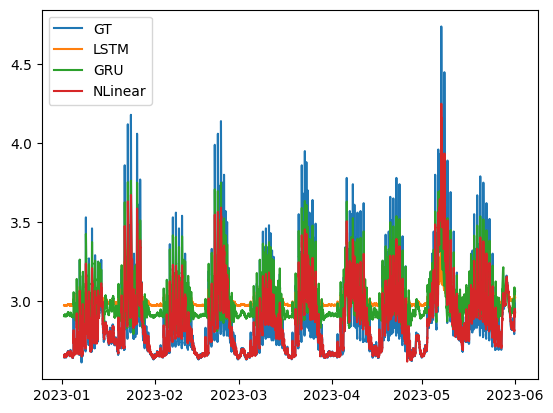

LSTM loss:  [0.05664171]
GRU loss:  [0.03145163]
NLInear loss:  0.007316981306148887


In [ ]:
import matplotlib.pyplot as plt

timesteps = range(len(ground_truth))


plt.plot(ls, ground_truth, label='GT')
plt.plot(ls, predictions_lstm, label='LSTM')
plt.plot(ls, predictions_gru, label='GRU')
plt.plot(ls, predictions_linear, label='NLinear')

plt.legend()
plt.show()

print('LSTM loss: ', sum([ (predictions_lstm[i]-ground_truth[i])**2 for i in timesteps])/len(timesteps))
print('GRU loss: ', sum([ (predictions_gru[i]-ground_truth[i])**2 for i in timesteps])/len(timesteps))
print('NLInear loss: ', sum([ (predictions_linear[i]-ground_truth[i])**2 for i in timesteps])/len(timesteps))

In [ ]:
print(timesteps)
timesteps = final_df['ymdhm']
print(len())
print(final_df['ymdhm'])

range(0, 21644)


TypeError: ignored

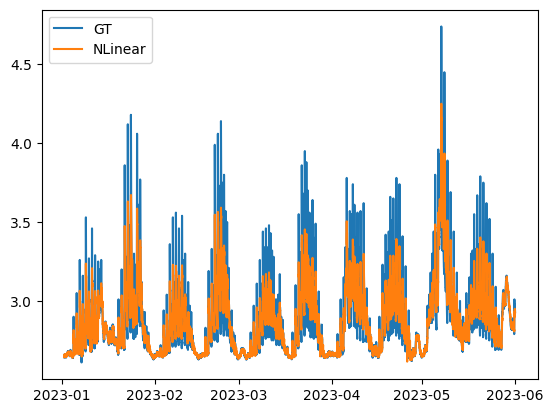

In [ ]:
plt.plot(ls, ground_truth, label='GT')
# plt.plot(timesteps, predictions_lstm, label='LSTM')
# plt.plot(timesteps, predictions_gru, label='GRU')
plt.plot(ls, predictions_linear, label='NLinear')

plt.legend()
plt.show()

In [ ]:
# final_df['ymdhm'] = pd.to_datetime(final_df['ymdhm'], format='%Y%m%d%H%M')
# print(final_df['ymdhm'])
print(test_2023_df)

[      Unnamed: 0  wlobscd         ymdhm    wl
0              0  1019630  202302282350  1.70
1              1  1019630  202302282340  1.70
2              2  1019630  202302282330  1.70
3              3  1019630  202302282320  1.71
4              4  1019630  202302282310  1.71
...          ...      ...           ...   ...
4027        4027  1019630  202302010040  1.69
4028        4028  1019630  202302010030  1.69
4029        4029  1019630  202302010020  1.69
4030        4030  1019630  202302010010  1.69
4031        4031  1019630  202302010000  1.69

[4032 rows x 4 columns],       Unnamed: 0  wlobscd         ymdhm    wl
0              0  1019630  202304302350  1.66
1              1  1019630  202304302340  1.66
2              2  1019630  202304302330  1.65
3              3  1019630  202304302320  1.65
4              4  1019630  202304302310  1.65
...          ...      ...           ...   ...
4315        4315  1019630  202304010040  1.72
4316        4316  1019630  202304010030  1.72
4317   

['201301_서울시(잠수교).csv', '201302_서울시(잠수교).csv', '201303_서울시(잠수교).csv', '201304_서울시(잠수교).csv', '201305_서울시(잠수교).csv', '201306_서울시(잠수교).csv', '201307_서울시(잠수교).csv', '201308_서울시(잠수교).csv', '201309_서울시(잠수교).csv', '201310_서울시(잠수교).csv', '201311_서울시(잠수교).csv', '201312_서울시(잠수교).csv', '201401_서울시(잠수교).csv', '201402_서울시(잠수교).csv', '201403_서울시(잠수교).csv', '201404_서울시(잠수교).csv', '201405_서울시(잠수교).csv', '201406_서울시(잠수교).csv', '201407_서울시(잠수교).csv', '201408_서울시(잠수교).csv', '201409_서울시(잠수교).csv', '201410_서울시(잠수교).csv', '201411_서울시(잠수교).csv', '201412_서울시(잠수교).csv', '201501_서울시(잠수교).csv', '201502_서울시(잠수교).csv', '201503_서울시(잠수교).csv', '201504_서울시(잠수교).csv', '201505_서울시(잠수교).csv', '201506_서울시(잠수교).csv', '201507_서울시(잠수교).csv', '201508_서울시(잠수교).csv', '201509_서울시(잠수교).csv', '201510_서울시(잠수교).csv', '201511_서울시(잠수교).csv', '201512_서울시(잠수교).csv', '201601_서울시(잠수교).csv', '201602_서울시(잠수교).csv', '201603_서울시(잠수교).csv', '201604_서울시(잠수교).csv', '201605_서울시(잠수교).csv', '201606_서울시(잠수교).csv', '201607_서울시(잠수교).csv', '201608_서울

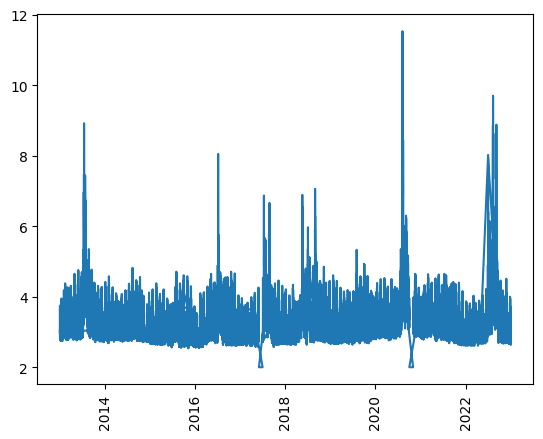

In [ ]:
import glob
import matplotlib.pyplot as plt
import csv
import datetime
import numpy as np


directory_countaining_csv_files = os.listdir('jamsu') ### CHANGE HERE

list_csv = [file for file in files_in_directory if '잠수교' in file] ### CHANGE HERE
number_of_files = len(list_csv)
list_csv.sort()
print(list_csv)

# directory_countaining_csv_files = 'datahj'
# number_of_files = len(glob.glob(f'{directory_countaining_csv_files}/202*.csv'))
# list_csv = glob.glob(f'{directory_countaining_csv_files}/202*.csv')
# list_csv.sort()
fig, ax = plt.subplots()

def myformat(x, pos):
    # print(x)
    if str(x).endswith('010000'):
        print(x)
        return "{}%".format(x)
    else:
        return None

# ax.xaxis.set_major_formatter(plt.FuncFormatter(myformat))
x = []
y = []
# for filename in csv_files:
#     df = pd.read_csv('hj/' + filename)
#     df = df.drop(columns=['fw', 'links'])  # dropping unnecessary columns
#     list_of_dataframes.append(df)
for filename in list_csv:
    x_cur = []
    y_cur = []
    first = True
    df = pd.read_csv('jamsu/' + filename)
    # print(df)
    lines = df
    for i, row in enumerate(df['wl']):

        if first == True:
            first = False
            continue
        x_cur.append(str(df['ymdhm'][i]))
        try:
            if df['wl'][i] < 1:
              print(df['ymdhm'][i])
              print(df['wl'][i])
              df['wl'][i] = 2
            y_cur.append(float(df['wl'][i]))
        except:
            y_cur.append(2)
    x_cur.reverse()
    y_cur.reverse()
    x = x + x_cur
    y = y + y_cur

x = [datetime.datetime.strptime(x_val, "%Y%m%d%H%M") for x_val in x]
ax.plot(x, y)
order = [i for i in range(number_of_files)]
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
# ax.xaxis.set_majxor_locator(plt.MaxNLocator(10))
# ax.xaxis.set_major_formatter(plt.FuncFormatter(myformat))
# plt.tick_params(
    # axis='x',          # changes apply to the x-axis
    # which='both',      # both major and minor ticks are affected
    # bottom=True,      # ticks along the bottom edge are off
    # top=False,         # ticks along the top edge are off
    # labelbottom=False) # labels along the bottom edge are off


# plt.plot(x, y, color = 'g',label = "Weather Data")


# plt.xlabel('Dates')
# plt.ylabel('Temperature(°C)')
# print(fig)
# plt.title('Weather Report', fontsize = 20)
# plt.grid()
# plt.legend()
# xticks = []
# for i, xi in enumerate(x):
#     if y[i] == None:
#         continue
#     if float(y[i]) > 4:
#         xticks.append(xi)
# ax.set_xticks(xticks)

plt.xticks(rotation='vertical')
plt.show()
